In [37]:
import pandas as pd
import numpy as np
import cv2
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import gc
import pytesseract
import glob
import re

In [46]:
from IPython.display import display, clear_output

Loading Training Analysis

In [2]:
def save_to_file(objeto, nome_arquivo):
    with open(nome_arquivo, 'wb') as output:
        pickle.dump(objeto, output, pickle.HIGHEST_PROTOCOL)


def load_file(nome_arquivo):
    with open(nome_arquivo, 'rb') as input:
        objeto = pickle.load(input)
    return objeto

In [36]:
list_of_files = glob.glob("../Analyse_Data/*.pkl")

Vou cortar a imagem em 2 para facilitar a minhha vida.

Depois eu tenho que permutar tudo na hora de treinar o modelo

In [ ]:
vector_img = {}
for file in list_of_files:
    if 'fila_treino' in file:
        load = load_file(file)
        for i in load:

            clear_output(wait=True)
            plt.imshow(i[0][7:23,56:73])
            display(plt.show())

            img = i[0].copy()
            
            ihash_1 = hash(img[7:23,56:65].tobytes())
            
            try:
                display(print('valor 1 salvo:',vector_img[ihash_1][1]))
            except:
                number = input('Digite para o valor 1: ')
                vector_img[ihash_1] = (img[7:23,56:65].copy(),int(number))
                
            hash_2 = hash(img[7:23,65:73].tobytes())
            
            try:
                display(print('valor 2 salvo:',vector_img[hash_2][1]))
            except:
                number = input('Digite para o valor 2: ')
                vector_img[hash_2] = (img[7:23,65:73].copy(),int(number))

In [112]:
len(vector_img)

773

In [113]:
save_to_file(vector_img, 'train_images_time.pkl')

In [425]:
vector_img = load_file('train_images_time.pkl')

In [426]:
images_left = []

In [427]:
images_right = []

In [428]:
for key in vector_img.keys():
    if vector_img[key][0].shape[1] == 9:
        images_left.append(vector_img[key])
    else:
        images_right.append(vector_img[key])

In [429]:
len(images_left),len(images_right)

(373, 400)

In [430]:
for i,key in enumerate(images_right):
    if key[1] > 9:
        print(i,key[1] )

205 23


In [431]:
_tuple_ = images_right.pop(205)

In [432]:
images_right.append((_tuple_[0],2))

### Adding Noise

In [433]:
def sp_noise(image,prob):
    '''
    Add salt and pepper noise to image
    prob: Probability of the noise
    '''
    output = np.zeros(image.shape,np.uint8)
    thresh = 1 - prob
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            if (i == 0) or (j == 0) or ( j ==7):
                rdn = np.random.random()
                if rdn >= thresh:
                    output[i][j] = np.random.randint(0,255)
                else:
                    output[i][j] = image[i][j]
            else:
                output[i][j] = image[i][j]
    inner = np.zeros
    return output

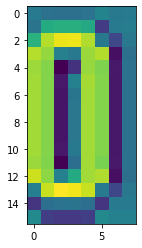

In [434]:
plt.imshow(images_right[0][0])

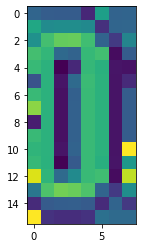

In [435]:
plt.imshow(sp_noise(teste,0.5))

In [436]:
imgs_left = len(images_left)
for i in range(imgs_left):
    images_left.append((sp_noise(images_left[i][0],0.5),images_left[i][1]))
    if images_left[i][1] <= 3:
        images_left.append((sp_noise(images_left[i][0],0.5),images_left[i][1]))
        images_left.append((sp_noise(images_left[i][0],0.5),images_left[i][1]))
        images_left.append((sp_noise(images_left[i][0],0.5),images_left[i][1]))
        images_left.append((sp_noise(images_left[i][0],0.5),images_left[i][1]))

In [437]:
imgs_right = len(images_right)
for i in range(imgs_right):
    images_right.append((sp_noise(images_right[i][0],0.5),images_right[i][1]))

In [438]:
import itertools

In [439]:
len(images_right), len(images_left)

(800, 982)

In [440]:
final = []
for r in itertools.product(images_left, images_right):
    final.append(( np.concatenate((r[0][0],r[1][0]),axis=1) ,  r[0][1]*10+r[1][1] ))

In [441]:
len(final)

785600

In [442]:
save_to_file(final, 'final_prepared_train_images_time.pkl')

In [388]:
values = [ f[1] for f in final]

In [389]:
pd.Series(values).value_counts()

79     51128
76     38512
70     31208
78     29216
77     23240
       ...  
83       952
4        864
93       664
3        612
103       40
Length: 92, dtype: int64

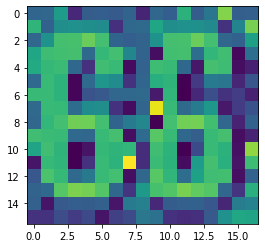

None

In [391]:
vector_img = {}
for f in final[-10:]:
    clear_output(wait=True)
    plt.imshow(f[0])
    display(plt.show())